#  lab 11

***Regression Analysis***

Suppose you have dataset with cars (CO2_passenger_cars2018b.csv). You what to know what features contribute to the increase of CO2 emission

1 Import needed libraries

2 read data from file

3 list dataset showing first 5 lines. View data types

4 verify possible values of categoric variable Ft

5 convert Petrol to PETROL and Diesel to DIESEL

6 verify again values of categoric variable Ft

7 convert variables 'm (kg)','ec (cm3)','ep (KW) and 'Enedc (g/km)' to numeric

    If ‘raise’, then invalid parsing will raise an exception
    If ‘coerce’, then invalid parsing will be set as NaN
    If ‘ignore’, then invalid parsing will return the input

8 remove all lines with NaN from df dataset and set to XY

9 create a Y vector and X matrix

10 create a regression model

11 analyse correlation between variables. Use seaborn. Like for example in:

    import seaborn as sns
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=[12, 12])
    corr_mtx = XY.corr()
    sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
    plt.title('Correlation analysis')
    plt.show()

12 convert Ft into dummy variables

13 add dummy variable to a new data set XY2

14 create a Y vector and X matrix

15 create a regression model


In [35]:
#list dataset showing first 5 lines. View data 
#verify possible values of categoric variable Ft


import pandas as pd
dataframe=pd.read_csv(r"CO2_passenger_cars2018b.csv",",")

print(dataframe.head(5))

dataframe=dataframe.dropna()
dataframe.info()

C:\Users\Claudio\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   Fabricante CommercialName m (kg)  Enedc (g/km)      Ft ec (cm3)  ep (KW)
0  VOLKSWAGEN           GOLF   1375         104.0  DIESEL     1598     85.0
1  VOLKSWAGEN           GOLF   1340         119.0  PETROL     1498    110.0
2  VOLKSWAGEN           GOLF   1320         120.0  PETROL     1498    110.0
3  VOLKSWAGEN           POLO   1145         104.0  PETROL      999     70.0
4  VOLKSWAGEN           POLO   1145         104.0  PETROL      999     70.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 936948 entries, 0 to 1048574
Data columns (total 7 columns):
Fabricante        936948 non-null object
CommercialName    936948 non-null object
m (kg)            936948 non-null object
Enedc (g/km)      936948 non-null float64
Ft                936948 non-null object
ec (cm3)          936948 non-null object
ep (KW)           936948 non-null float64
dtypes: float64(2), object(5)
memory usage: 57.2+ MB


In [36]:
#select stuff in a data frame 

o=dataframe[['m (kg)','Enedc (g/km)']]
print(o)

        m (kg)  Enedc (g/km)
0         1375         104.0
1         1340         119.0
2         1320         120.0
3         1145         104.0
4         1145         104.0
...        ...           ...
1048570   1050         104.0
1048571   1050         104.0
1048572   1050         104.0
1048573   1050         104.0
1048574   1050         104.0

[936948 rows x 2 columns]


In [37]:
#convert variables 'm (kg)','ec (cm3)','ep (KW) and 'Enedc (g/km)' to numeric

dataframe.iloc[:,2]=pd.to_numeric(dataframe.iloc[:,2], errors='coerce')

dataframe.iloc[:,3]=pd.to_numeric(dataframe.iloc[:,3], errors='coerce')


In [38]:
dataframe.iloc[:,5]=pd.to_numeric(dataframe.iloc[:,5], errors='coerce')


In [39]:
dataframe.iloc[:,6]=pd.to_numeric(dataframe.iloc[:,6], errors='coerce')

In [40]:
dataframe.dtypes

Fabricante         object
CommercialName     object
m (kg)            float64
Enedc (g/km)      float64
Ft                 object
ec (cm3)          float64
ep (KW)           float64
dtype: object

In [41]:
#8 remove all lines with NaN from df dataset and set to XY
#9 create a Y vector and X matrix
#10 create a regression model
#11 analyse correlation between variables. Use seaborn. Like for example in:
#import seaborn as sns
#import matplotlib.pyplot as plt
#fig = plt.figure(figsize=[12, 12])
#corr_mtx = XY.corr()
#sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
#plt.title('Correlation analysis')
#plt.show()
#12 convert Ft into dummy variables
#13 add dummy variable to a new data set XY2
#14 create a Y vector and X matrix
#15 create a regression model

In [42]:
y=dataframe[['m (kg)']]

In [43]:
print(y)

         m (kg)
0        1375.0
1        1340.0
2        1320.0
3        1145.0
4        1145.0
...         ...
1048570  1050.0
1048571  1050.0
1048572  1050.0
1048573  1050.0
1048574  1050.0

[936948 rows x 1 columns]


In [44]:
print(dataframe)

         Fabricante CommercialName  m (kg)  Enedc (g/km)      Ft  ec (cm3)  \
0        VOLKSWAGEN           GOLF  1375.0         104.0  DIESEL    1598.0   
1        VOLKSWAGEN           GOLF  1340.0         119.0  PETROL    1498.0   
2        VOLKSWAGEN           GOLF  1320.0         120.0  PETROL    1498.0   
3        VOLKSWAGEN           POLO  1145.0         104.0  PETROL     999.0   
4        VOLKSWAGEN           POLO  1145.0         104.0  PETROL     999.0   
...             ...            ...     ...           ...     ...       ...   
1048570     PEUGEOT            208  1050.0         104.0  Petrol    1199.0   
1048571     PEUGEOT            208  1050.0         104.0  Petrol    1199.0   
1048572     PEUGEOT            208  1050.0         104.0  Petrol    1199.0   
1048573     PEUGEOT            208  1050.0         104.0  Petrol    1199.0   
1048574     PEUGEOT            208  1050.0         104.0  Petrol    1199.0   

         ep (KW)  
0           85.0  
1          110.0  
2     

In [45]:
x=dataframe[['Enedc (g/km)','ec (cm3)','m (kg)']]
x.head(5)

,Enedc (g/km),ec (cm3),m (kg)
0,104.0,1598.0,1375.0
1,119.0,1498.0,1340.0
2,120.0,1498.0,1320.0
3,104.0,999.0,1145.0
4,104.0,999.0,1145.0


In [46]:
y.head(5)

,m (kg)
0,1375.0
1,1340.0
2,1320.0
3,1145.0
4,1145.0


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
model = regression.fit(x, y)


model.intercept_

array([4.77484718e-11])

In [49]:
model.coef_

array([[ 1.27395976e-13, -3.07896931e-14,  1.00000000e+00]])

In [50]:
model.score(x,y)

1.0

In [51]:
corr_mtx = x.corr()

In [52]:
print(corr_mtx)

              Enedc (g/km)  ec (cm3)    m (kg)
Enedc (g/km)      1.000000  0.577439  0.623323
ec (cm3)          0.577439  1.000000  0.774332
m (kg)            0.623323  0.774332  1.000000


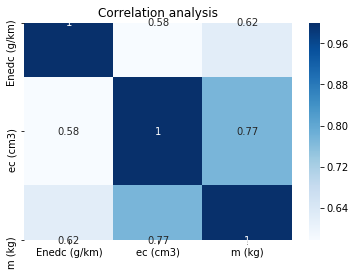

In [53]:
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [54]:
#convert Ft into dummy variables
dataframe['Ft']=dataframe['Ft'].apply({'Petrol':'PETROL','PETROL':'PETROL','Diesel':'DIESEL','DIESEL':'DIESEL'}.get)
print(dataframe)

         Fabricante CommercialName  m (kg)  Enedc (g/km)      Ft  ec (cm3)  \
0        VOLKSWAGEN           GOLF  1375.0         104.0  DIESEL    1598.0   
1        VOLKSWAGEN           GOLF  1340.0         119.0  PETROL    1498.0   
2        VOLKSWAGEN           GOLF  1320.0         120.0  PETROL    1498.0   
3        VOLKSWAGEN           POLO  1145.0         104.0  PETROL     999.0   
4        VOLKSWAGEN           POLO  1145.0         104.0  PETROL     999.0   
...             ...            ...     ...           ...     ...       ...   
1048570     PEUGEOT            208  1050.0         104.0  PETROL    1199.0   
1048571     PEUGEOT            208  1050.0         104.0  PETROL    1199.0   
1048572     PEUGEOT            208  1050.0         104.0  PETROL    1199.0   
1048573     PEUGEOT            208  1050.0         104.0  PETROL    1199.0   
1048574     PEUGEOT            208  1050.0         104.0  PETROL    1199.0   

         ep (KW)  
0           85.0  
1          110.0  
2     

In [55]:
dataframe['Ft']=dataframe['Ft'].apply({'PETROL':0,'DIESEL':1}.get)
print(dataframe['Ft'])

0          1
1          0
2          0
3          0
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: Ft, Length: 936948, dtype: int64


In [56]:
y=dataframe[['Ft']]
print(y)

         Ft
0         1
1         0
2         0
3         0
4         0
...      ..
1048570   0
1048571   0
1048572   0
1048573   0
1048574   0

[936948 rows x 1 columns]


In [57]:
x2=dataframe[['Enedc (g/km)','m (kg)','Enedc (g/km)','ec (cm3)','ep (KW)']]
y=dataframe[['Ft']]
x2.head(5)

,Enedc (g/km),m (kg),Enedc (g/km),ec (cm3),ep (KW)
0,104.0,1375.0,104.0,1598.0,85.0
1,119.0,1340.0,119.0,1498.0,110.0
2,120.0,1320.0,120.0,1498.0,110.0
3,104.0,1145.0,104.0,999.0,70.0
4,104.0,1145.0,104.0,999.0,70.0


In [58]:
y.head(5)

,Ft
0,1
1,0
2,0
3,0
4,0


In [59]:
regression = LinearRegression()
model = regression.fit(x2, y)


model.intercept_

array([-0.41654131])

In [60]:
model.score(x2,y)

0.6698912723322366

In [61]:
import statsmodels.api as sm
x2=sm.add_constant(x2)
model = sm.OLS(y,x2).fit()

C:\Users\Claudio\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ft   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                 4.753e+05
Date:                Sun, 08 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:54:44   Log-Likelihood:            -1.4347e+05
No. Observations:              936948   AIC:                         2.870e+05
Df Residuals:                  936943   BIC:                         2.870e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4165      0.002   -208.112      0.000      -0.420      -0.413
Enedc (g/km)    -0.0067   9.26e-06   -718.408      0.000      -0.007      -0.007
m (kg)           0.0014   1.92e-06    753.119      0.000       0.001       0.001
Enedc (g/km)    -0.0067   9.26e-06   -718.408      0.000      -0.007      -0.007
ec (cm3)         0.0007   1.27e-06    540.267      0.000       0.001       0.001
ep (KW)         -0.0058   1.53e-05   -379.166      0.000      -0.006      -0.006
==============================================================================
Omnibus:                   149431.671   Durbin-Watson:                   0.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           641092.855
Skew:                          -0.734   Prob(JB):                         0.00
Kurtosis:                       6.777   Cond. No.                     2.00e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.88e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
import numpy as np
np.asarray(x)

array([[ 104., 1598., 1375.],
       [ 119., 1498., 1340.],
       [ 120., 1498., 1320.],
       ...,
       [ 104., 1199., 1050.],
       [ 104., 1199., 1050.],
       [ 104., 1199., 1050.]])

In [64]:
#logistic regression 


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.70, random_state=0)

In [65]:
logistic_regression= LogisticRegression()

In [66]:
logistic_regression.fit( x_train, y_train)

C:\Users\Claudio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Claudio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
y_pred=logistic_regression.predict(x_test)

In [89]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)

ValueError: Shape of passed values is (1, 2), indices imply (655864, 2)

In [88]:
sn.heatmap(confusion_matrix, annot=True)

NameError: name 'confusion_matrix' is not defined

In [73]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
probs = probs[:, 1]

Accuracy:  0.927558152299867


NameError: name 'probs' is not defined

In [74]:
probs = model.predict_proba(x_test)
probs = probs[:, 1]

AttributeError: 'OLSResults' object has no attribute 'predict_proba'

In [75]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

NameError: name 'roc_auc_score' is not defined

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

NameError: name 'roc_curve' is not defined

In [77]:
plot_roc_curve(fpr, tpr)

NameError: name 'plot_roc_curve' is not defined

In [78]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [79]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [80]:
#RANDOM FOREST 




trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=1)

In [81]:
model = RandomForestClassifier()
model.fit(trainX, trainy)

C:\Users\Claudio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Claudio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
probs = model.predict_proba(testX)

In [83]:
probs = probs[:, 1]

In [84]:
auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)

AUC: 1.00


In [85]:
fpr, tpr, thresholds = roc_curve(testy, probs)

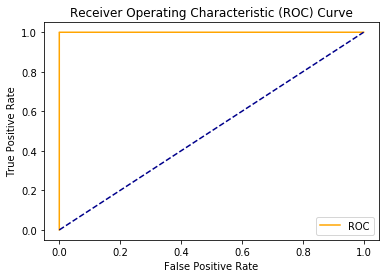

In [86]:
plot_roc_curve(fpr, tpr)

In [87]:
import pandas as pd

dataframe.to_html('test.html')
PdfFilename='pdfPrintOut.pdf'
pdf.from_file('test.html', PdfFilename)

UnicodeEncodeError: 'charmap' codec can't encode character '\u0425' in position 80432930: character maps to <undefined>

In [ ]:
import pandas as pd

#§pd.set_option("float_format", '%.1f')

dataframe.to_html('test.html')

In [ ]:
from jinja2 import Environment, FileSystemLoader
dataframe.to_html('test.html')
env = Environment(loader=FileSystemLoader('.'))
template = env.get_template('test.html')

In [ ]:
from jinja2 import Environment, FileSystemLoader
env = Environment(loader=FileSystemLoader('.'))
template = env.get_template("myreport.html")

In [ ]:
template_vars = {"title" : "Sales Funnel Report - National",
                 "national_pivot_table": sales_report.to_html()}

In [ ]:
html_out = template.render(template_vars)

In [ ]:
from weasyprint import HTML
HTML(string=html_out).write_pdf("report.pdf")